In [29]:
import sys
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt

file_path = "Surgical_Cases_fm_3.3.csv" #"cleaned.csv"
df = pd.read_csv(file_path,sep=',')

# trueTestDF=df[df['ResultAfterSurgery'].isnull()]
# df.dropna(subset=['ResultAfterSurgery'], how='all',axis=0,inplace=True)




df.columns

Index([u'Masked FIN', u'age', u'Sequence No.', u'SURG_PROCEDURE',
       u'Duration of Surgery (hh:mm).1', u'SURGICAL_SPECIALTY',
       u'Surgeon Hash Name', u'PATIENT_TYPE', u'SN - BM - Pre-Op INR',
       u'SN - BM - Pre-Op Platelet Count', u'SN - BM - PRBC Ordered',
       u'Allogeneic Blood Transfusion', u'SN - BM - Red Blood Cells',
       u'SN - BM - Fresh Frozen Plasma', u'SN - BM - Platelets',
       u'SN - BM - Cryoprecipitate', u'ResultsBeforeSurgery',
       u'ResultAfterSurgery', u'EBL'],
      dtype='object')

In [30]:
df['SN - BM - PRBC Ordered']=df['SN - BM - PRBC Ordered'].fillna(0.0)

In [31]:
df=df.replace('.',0.0)

In [32]:
df['SN - BM - Pre-Op INR']=df['SN - BM - Pre-Op INR'].fillna(0.0)
df['SN - BM - Pre-Op Platelet Count']=df['SN - BM - Pre-Op Platelet Count'].fillna(0.0)

In [33]:
df.describe()

,age,Sequence No.,SN - BM - PRBC Ordered,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery
count,27196.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,19428.000000
mean,60.520702,14262.616416,1.269241,0.580626,0.340837,0.228373,0.766074,12.357422,11.177199
std,15.061706,8400.507829,3.482613,2.537552,2.042489,1.194519,4.938831,2.559800,2.035386
min,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.107500,2.808300
25%,51.000000,6931.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.802500,9.802900
50%,63.000000,14127.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.804800,11.108800
75%,71.000000,21487.000000,2.052000,0.000000,0.000000,0.000000,0.000000,14.204900,12.603800
max,103.000000,29285.000000,414.601000,72.088700,55.004500,57.005500,125.047000,19.906300,19.108500


In [34]:
print df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Red Blood Cells']>0)]].shape
df.drop(df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Red Blood Cells']>0)]].index,inplace=True)

(336, 19)


In [35]:
df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Red Blood Cells']>0)]]

,Masked FIN,age,Sequence No.,SURG_PROCEDURE,Duration of Surgery (hh:mm).1,SURGICAL_SPECIALTY,Surgeon Hash Name,PATIENT_TYPE,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,SN - BM - PRBC Ordered,Allogeneic Blood Transfusion,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery,EBL


In [36]:
print df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Fresh Frozen Plasma']>0)]].shape
df.drop(df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Fresh Frozen Plasma']>0)]].index,inplace=True)

(40, 19)


In [37]:
print df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Platelets']>0)]].shape
df.drop(df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Platelets']>0)]].index,inplace=True)

(30, 19)


In [38]:
print df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Cryoprecipitate']>0)]].shape
df.drop(df.loc[[all([a, b]) for a, b in zip(df['SN - BM - PRBC Ordered']==0,df['SN - BM - Cryoprecipitate']>0)]].index,inplace=True)

(3, 19)


In [39]:
# print df['ResultsBeforeSurgery'].isnull().shape
# df.dropna(subset=['ResultsBeforeSurgery'], how='all',axis=0,inplace=True)

In [40]:
del df['Masked FIN']
del df['Sequence No.']
del df['Duration of Surgery (hh:mm).1']
del df['SN - BM - PRBC Ordered']
del df['EBL']

In [41]:
print df[df['age'].isnull()].shape
df.drop(df[df['age'].isnull()].index,inplace=True)
df['ResultAfterSurgery']=df['ResultAfterSurgery'].fillna(0.0)

(21, 14)


In [42]:
df.describe()

,age,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery
count,26787.000000,26787.000000,26787.000000,26787.000000,26787.000000,26787.000000,26787.000000
mean,60.453205,0.538954,0.321332,0.217105,0.742109,12.378347,7.960658
std,15.083706,2.459470,1.991121,1.177681,4.892697,2.557197,5.356095
min,13.000000,0.000000,0.000000,0.000000,0.000000,3.107500,0.000000
25%,51.000000,0.000000,0.000000,0.000000,0.000000,10.805900,0.000000
50%,63.000000,0.000000,0.000000,0.000000,0.000000,12.806400,10.103600
75%,71.000000,0.000000,0.000000,0.000000,0.000000,14.206050,12.002800
max,103.000000,72.088700,55.004500,57.005500,125.047000,19.906300,19.108500


In [43]:
pd.isnull(df).any()

age                                False
SURG_PROCEDURE                     False
SURGICAL_SPECIALTY                 False
Surgeon Hash Name                  False
PATIENT_TYPE                       False
SN - BM - Pre-Op INR               False
SN - BM - Pre-Op Platelet Count    False
Allogeneic Blood Transfusion       False
SN - BM - Red Blood Cells          False
SN - BM - Fresh Frozen Plasma      False
SN - BM - Platelets                False
SN - BM - Cryoprecipitate          False
ResultsBeforeSurgery               False
ResultAfterSurgery                 False
dtype: bool

In [44]:
# df['SURG_PROCEDURE']=pd.factorize(df['SURG_PROCEDURE'])

In [45]:
df.dtypes

age                                float64
SURG_PROCEDURE                      object
SURGICAL_SPECIALTY                  object
Surgeon Hash Name                   object
PATIENT_TYPE                        object
SN - BM - Pre-Op INR                object
SN - BM - Pre-Op Platelet Count     object
Allogeneic Blood Transfusion        object
SN - BM - Red Blood Cells          float64
SN - BM - Fresh Frozen Plasma      float64
SN - BM - Platelets                float64
SN - BM - Cryoprecipitate          float64
ResultsBeforeSurgery               float64
ResultAfterSurgery                 float64
dtype: object

In [46]:
df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].astype('category')
# df['SURG_PROCEDURE'] = df['SURG_PROCEDURE'].cat.codes

df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].astype('category')
# df['SURGICAL_SPECIALTY'] = df['SURGICAL_SPECIALTY'].cat.codes

df['PATIENT_TYPE'] = df['PATIENT_TYPE'].astype('category')
# df['PATIENT_TYPE'] = df['PATIENT_TYPE'].cat.codes

df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].astype('category')
# df['Allogeneic Blood Transfusion'] = df['Allogeneic Blood Transfusion'].cat.codes

df['Surgeon Hash Name'] = df['Surgeon Hash Name'].astype('category')
# df['Surgeon Hash Name'] = df['Surgeon Hash Name'].cat.codes
# df['ResultsBeforeSurgery'] = df['ResultsBeforeSurgery'].astype('category')
# df['ResultsBeforeSurgery'] = df['ResultsBeforeSurgery'].cat.codes
# df['ResultAfterSurgery'] = df['ResultAfterSurgery'].astype('category')
# df['ResultAfterSurgery'] = df['ResultAfterSurgery'].cat.codes

df['SN - BM - Pre-Op INR'] = df['SN - BM - Pre-Op INR'].astype('float64')
df['SN - BM - Pre-Op Platelet Count'] = df['SN - BM - Pre-Op Platelet Count'].astype('float64')

In [47]:
df.dtypes

age                                 float64
SURG_PROCEDURE                     category
SURGICAL_SPECIALTY                 category
Surgeon Hash Name                  category
PATIENT_TYPE                       category
SN - BM - Pre-Op INR                float64
SN - BM - Pre-Op Platelet Count     float64
Allogeneic Blood Transfusion       category
SN - BM - Red Blood Cells           float64
SN - BM - Fresh Frozen Plasma       float64
SN - BM - Platelets                 float64
SN - BM - Cryoprecipitate           float64
ResultsBeforeSurgery                float64
ResultAfterSurgery                  float64
dtype: object

In [48]:
df.describe()

,age,SN - BM - Pre-Op INR,SN - BM - Pre-Op Platelet Count,SN - BM - Red Blood Cells,SN - BM - Fresh Frozen Plasma,SN - BM - Platelets,SN - BM - Cryoprecipitate,ResultsBeforeSurgery,ResultAfterSurgery
count,26787.000000,26787.000000,26787.000000,26787.000000,26787.000000,26787.000000,26787.000000,26787.000000,26787.000000
mean,60.453205,1.020189,215.652425,0.538954,0.321332,0.217105,0.742109,12.378347,7.960658
std,15.083706,6.671046,735.634734,2.459470,1.991121,1.177681,4.892697,2.557197,5.356095
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.107500,0.000000
25%,51.000000,0.904000,153.130000,0.000000,0.000000,0.000000,0.000000,10.805900,0.000000
50%,63.000000,1.003000,218.070000,0.000000,0.000000,0.000000,0.000000,12.806400,10.103600
75%,71.000000,1.008000,274.190000,0.000000,0.000000,0.000000,0.000000,14.206050,12.002800
max,103.000000,732.682000,108032.460000,72.088700,55.004500,57.005500,125.047000,19.906300,19.108500


In [49]:
pearson = df.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_target.sort(ascending=False)
print corr_with_target[abs(corr_with_target).argsort()[::-1]]

age                                0.055404
ResultsBeforeSurgery               0.051943
SN - BM - Red Blood Cells          0.013754
SN - BM - Cryoprecipitate          0.004713
SN - BM - Pre-Op Platelet Count    0.004555
SN - BM - Platelets                0.004195
SN - BM - Fresh Frozen Plasma     -0.003809
SN - BM - Pre-Op INR              -0.000764
Name: ResultAfterSurgery, dtype: float64


/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [50]:
attrs = pearson.iloc[:-1,:-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
print unique_important_corrs

                                      attribute pair  correlation
4  (SN - BM - Fresh Frozen Plasma, SN - BM - Red ...     0.836347
0  (SN - BM - Fresh Frozen Plasma, SN - BM - Plat...     0.812333
2   (SN - BM - Platelets, SN - BM - Red Blood Cells)     0.766779
1   (SN - BM - Cryoprecipitate, SN - BM - Platelets)     0.742377
5  (SN - BM - Cryoprecipitate, SN - BM - Fresh Fr...     0.655727
3  (SN - BM - Cryoprecipitate, SN - BM - Red Bloo...     0.645869


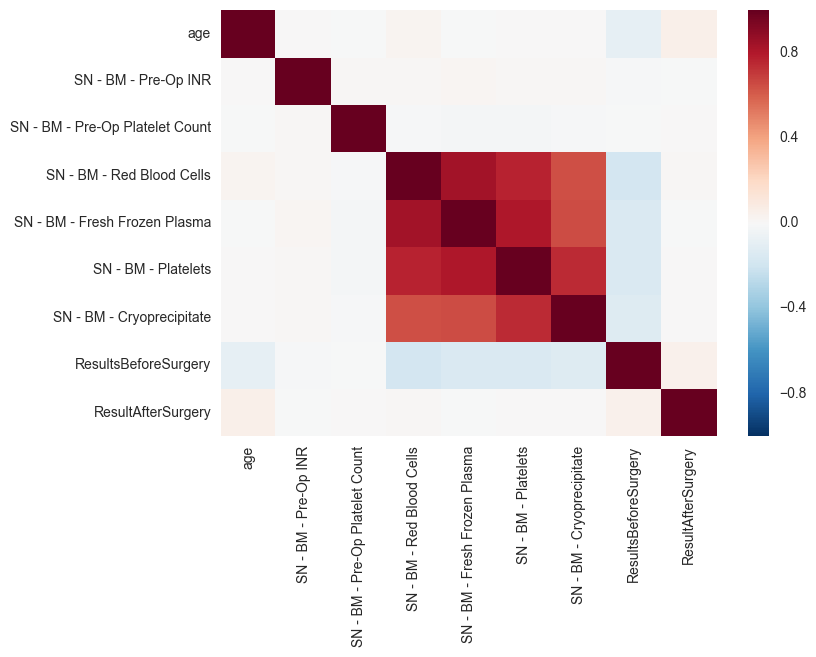

In [63]:
import seaborn as sns; sns.set()
ax = sns.heatmap(pearson,vmin=-1, vmax=1)
plt.show()

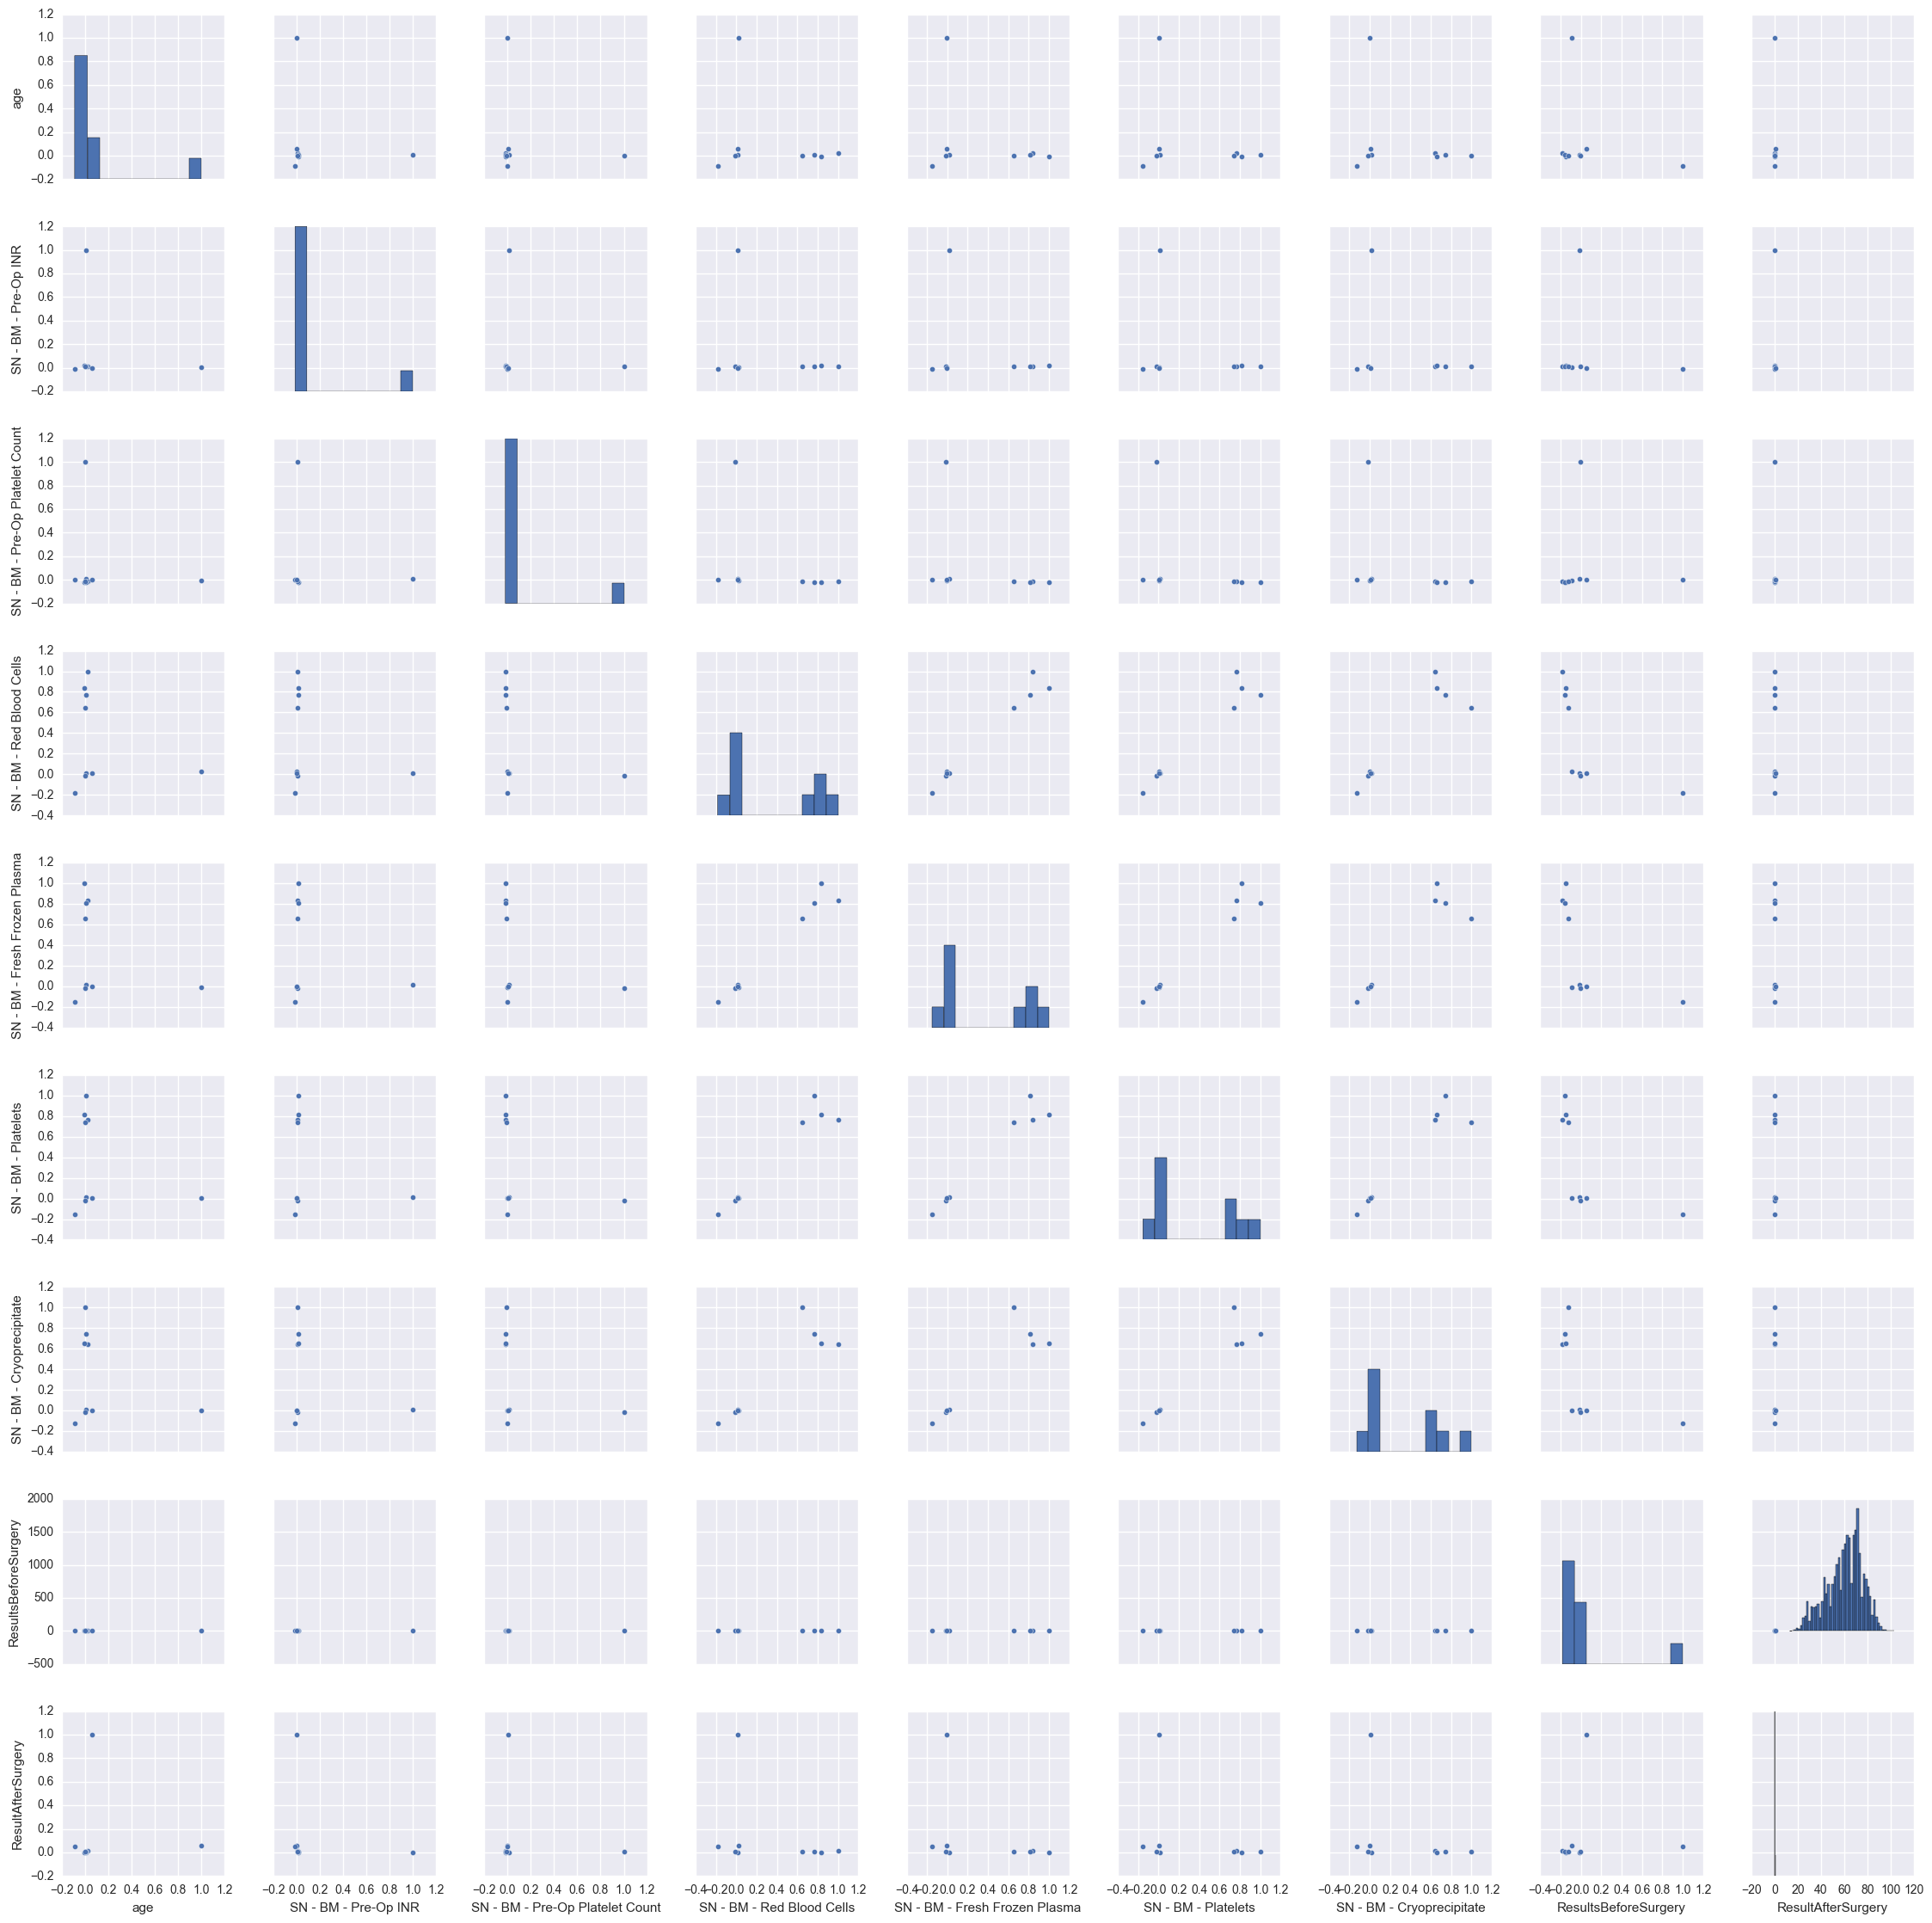

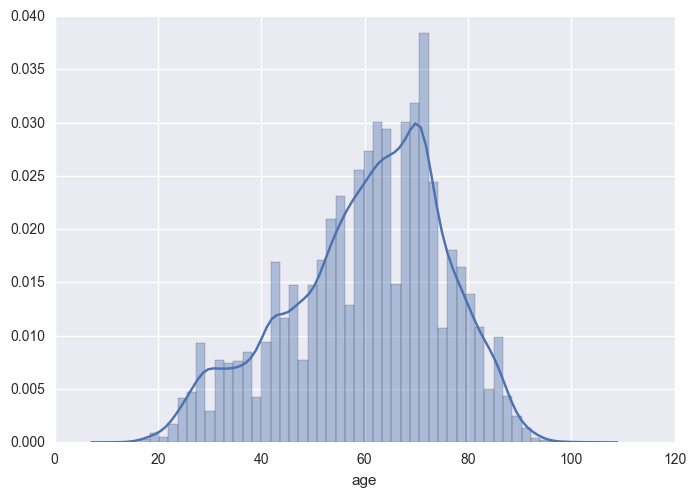

In [80]:
import matplotlib.pyplot as plt
attr = df['age']
# plt.hist(attr)
plt.hist(attr, bins=50)
plt.show()
sns.distplot(attr)
plt.show()
g=sns.pairplot(pearson)
# plt.show()
# g.show()


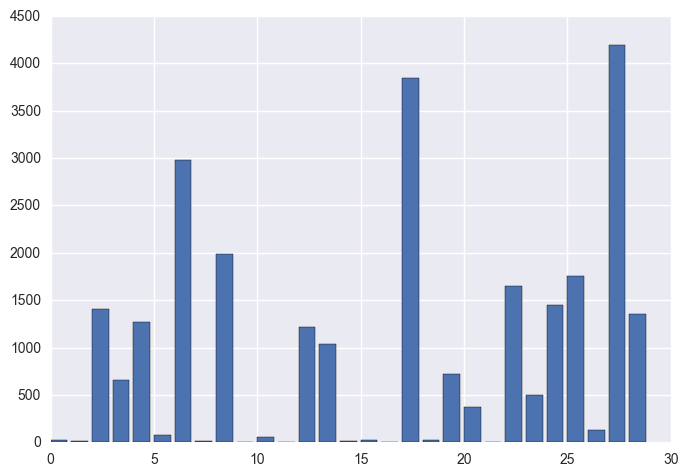

In [83]:
cat_attr = df['SURGICAL_SPECIALTY'].cat.codes
h = cat_attr.value_counts()
values, counts = h.index, h
plt.bar(values, counts)
# or more compactly:
# plt.bar(*list(zip(*cat_attr.value_counts().i)))
plt.show()

In [ ]:
# names=df.columns
# # plot heatmap
# correlations=df.corr()
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
# ticks = np.arange(0,len(names)+1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(names,rotation=90)
# ax.set_yticklabels(names)
# plt.show()

In [ ]:
# correlations

In [ ]:
# plt=correlations[['age']].plot(kind='hist')

In [ ]:
# plt.figure